___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7954,7955,15626898,Teng,743,France,Male,30,7,77599.230,1,0,0,144407.100,0
3520,3521,15569248,Milanesi,554,France,Female,43,10,0.000,2,1,0,149629.130,1
4406,4407,15623450,Brown,637,Germany,Female,27,7,135842.890,1,1,1,101418.050,0
4095,4096,15616929,De Luca,730,Spain,Male,62,5,112181.080,1,0,1,61513.870,0
3159,3160,15680587,Esposito,834,France,Male,23,4,131254.810,1,1,0,20199.300,0
4390,4391,15674328,Moreno,670,France,Female,40,3,47364.450,1,1,1,148579.430,1
2383,2384,15642468,Clark,697,France,Male,42,9,132739.260,2,0,0,174667.650,0
9343,9344,15798749,Davidson,845,Germany,Female,43,3,152063.590,2,1,0,97910.060,0
9282,9283,15799435,Hayes,619,Spain,Male,34,1,0.000,1,1,0,139919.380,0
7806,7807,15750410,Jordan,680,France,Female,25,4,123816.500,1,1,1,90162.350,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [8]:
df = df.drop(['Surname'], axis=1)

In [9]:
df.shape

(10000, 13)

In [10]:
print(df['Geography'].unique())
#print(df.Courses.unique())

['France' 'Spain' 'Germany']


<AxesSubplot:xlabel='Exited', ylabel='Density'>

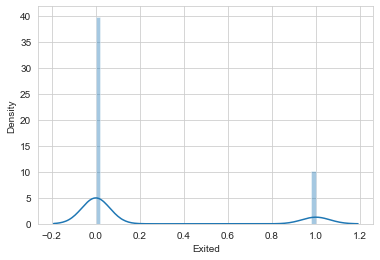

In [11]:
sns.distplot(df["Exited"])

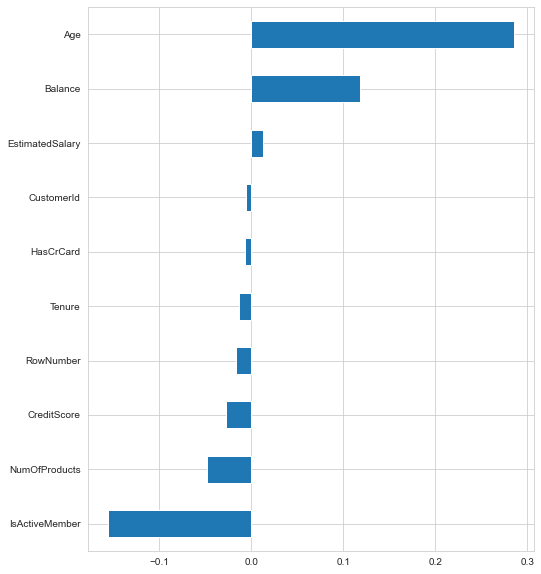

In [12]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

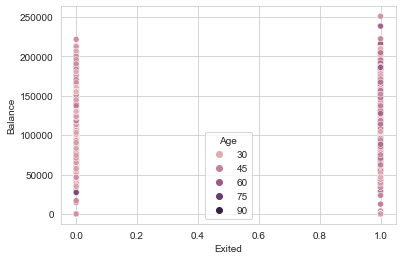

In [13]:
sns.scatterplot(x = 'Exited',y = 'Balance', data = df, hue = "Age");

<AxesSubplot:xlabel='Exited', ylabel='count'>

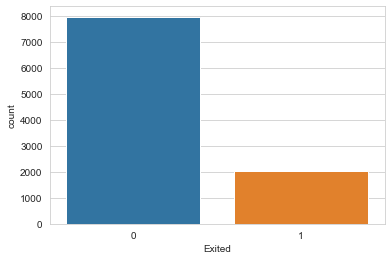

In [14]:
sns.countplot(df["Exited"])

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

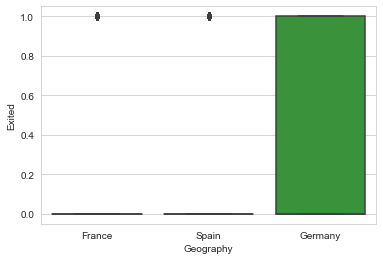

In [15]:
sns.boxplot(x="Geography", y="Exited", data=df)

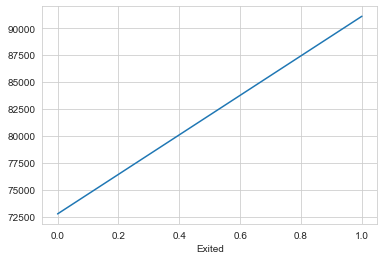

In [16]:
df.groupby('Exited')['Balance'].mean().plot();

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

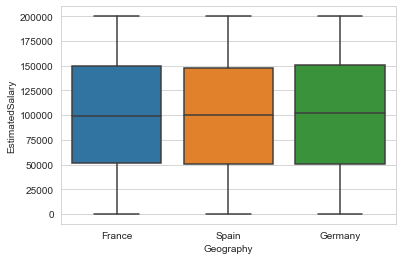

In [17]:
sns.boxplot(x="Geography", y="EstimatedSalary", data=df)

In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)#.set_output(transform="pandas")

In [19]:
enc.fit_transform(df[["Geography"]])

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [20]:
enc.fit_transform(df[["Gender"]])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [22]:
def change(x):
    if x == "Germany":
        return 0
    elif x == 'France':
        return 1
    else:
        return 2

In [23]:
df["Geography"] = df["Geography"].apply(change)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 1015.8+ KB


In [25]:
def gender(x):
    if x == "Male":
        return 0
    else:
        return 1
    

In [26]:
df["Gender"] = df["Gender"].apply(gender)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Geography,10000.000,0.997,0.706,0.000,0.000,1.000,1.000,2.000
Gender,10000.000,0.454,0.498,0.000,0.000,0.000,1.000,1.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [30]:
seed = 42

In [31]:


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

2023-01-20 14:17:47.874874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
#pip install tensorflow --user

In [36]:
X_train.shape

(8000, 12)

In [37]:
X_test.shape

(2000, 12)

In [38]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(24, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

2023-01-20 14:17:57.111014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1)

Epoch 1/400
225/225 [==============================] - 2s 3ms/step - loss: 0.4969 - accuracy: 0.7929 - val_loss: 0.4513 - val_accuracy: 0.8100
Epoch 2/400
225/225 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.7990 - val_loss: 0.4292 - val_accuracy: 0.8275
Epoch 3/400
225/225 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.8121 - val_loss: 0.4141 - val_accuracy: 0.8350
Epoch 4/400
225/225 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8188 - val_loss: 0.4164 - val_accuracy: 0.8275
Epoch 5/400
225/225 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8235 - val_loss: 0.3995 - val_accuracy: 0.8413
Epoch 6/400
225/225 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8253 - val_loss: 0.3913 - val_accuracy: 0.8425
Epoch 7/400
225/225 [==============================] - 1s 2ms/step - loss: 0.4102 - accuracy: 0.8314 - val_loss: 0.3826 - val_accuracy: 0.8500

Epoch 58/400
225/225 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8678 - val_loss: 0.3212 - val_accuracy: 0.8637
Epoch 59/400
225/225 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8686 - val_loss: 0.3290 - val_accuracy: 0.8662
Epoch 60/400
225/225 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8687 - val_loss: 0.3178 - val_accuracy: 0.8712
Epoch 61/400
225/225 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.8668 - val_loss: 0.3235 - val_accuracy: 0.8587
Epoch 62/400
225/225 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8686 - val_loss: 0.3154 - val_accuracy: 0.8737
Epoch 63/400
225/225 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8669 - val_loss: 0.3173 - val_accuracy: 0.8788
Epoch 64/400
225/225 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8671 - val_loss: 0.3137 - val_accuracy:

Epoch 115/400
225/225 [==============================] - 1s 3ms/step - loss: 0.3069 - accuracy: 0.8718 - val_loss: 0.3280 - val_accuracy: 0.8700
Epoch 116/400
225/225 [==============================] - 1s 3ms/step - loss: 0.3069 - accuracy: 0.8722 - val_loss: 0.3308 - val_accuracy: 0.8625
Epoch 117/400
225/225 [==============================] - 1s 3ms/step - loss: 0.3081 - accuracy: 0.8733 - val_loss: 0.3281 - val_accuracy: 0.8687
Epoch 118/400
225/225 [==============================] - 1s 3ms/step - loss: 0.3060 - accuracy: 0.8736 - val_loss: 0.3672 - val_accuracy: 0.8400
Epoch 119/400
225/225 [==============================] - 1s 3ms/step - loss: 0.3097 - accuracy: 0.8731 - val_loss: 0.3299 - val_accuracy: 0.8637
Epoch 120/400
225/225 [==============================] - 1s 3ms/step - loss: 0.3053 - accuracy: 0.8760 - val_loss: 0.3311 - val_accuracy: 0.8562
Epoch 121/400
225/225 [==============================] - 1s 3ms/step - loss: 0.3064 - accuracy: 0.8726 - val_loss: 0.3377 - val_ac

225/225 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.8808 - val_loss: 0.3389 - val_accuracy: 0.8625
Epoch 172/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.8797 - val_loss: 0.3479 - val_accuracy: 0.8500
Epoch 173/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2895 - accuracy: 0.8808 - val_loss: 0.3430 - val_accuracy: 0.8625
Epoch 174/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2890 - accuracy: 0.8835 - val_loss: 0.3397 - val_accuracy: 0.8625
Epoch 175/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2884 - accuracy: 0.8828 - val_loss: 0.3403 - val_accuracy: 0.8537
Epoch 176/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2897 - accuracy: 0.8814 - val_loss: 0.3449 - val_accuracy: 0.8550
Epoch 177/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2875 - accuracy: 0.8821 - val_loss: 0.3495 - val_accuracy: 0.8575

225/225 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.8890 - val_loss: 0.3470 - val_accuracy: 0.8600
Epoch 228/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2774 - accuracy: 0.8878 - val_loss: 0.3555 - val_accuracy: 0.8562
Epoch 229/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2750 - accuracy: 0.8894 - val_loss: 0.3484 - val_accuracy: 0.8637
Epoch 230/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2761 - accuracy: 0.8879 - val_loss: 0.3532 - val_accuracy: 0.8675
Epoch 231/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2757 - accuracy: 0.8881 - val_loss: 0.3533 - val_accuracy: 0.8612
Epoch 232/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2783 - accuracy: 0.8885 - val_loss: 0.3501 - val_accuracy: 0.8600
Epoch 233/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2756 - accuracy: 0.8881 - val_loss: 0.3737 - val_accuracy: 0.8462

225/225 [==============================] - 1s 3ms/step - loss: 0.2620 - accuracy: 0.8956 - val_loss: 0.3600 - val_accuracy: 0.8575
Epoch 284/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2612 - accuracy: 0.8982 - val_loss: 0.3681 - val_accuracy: 0.8425
Epoch 285/400
225/225 [==============================] - 1s 3ms/step - loss: 0.2646 - accuracy: 0.8978 - val_loss: 0.3541 - val_accuracy: 0.8600
Epoch 286/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.8957 - val_loss: 0.3914 - val_accuracy: 0.8450
Epoch 287/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.8964 - val_loss: 0.3592 - val_accuracy: 0.8612
Epoch 288/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2615 - accuracy: 0.8982 - val_loss: 0.3608 - val_accuracy: 0.8625
Epoch 289/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2623 - accuracy: 0.8935 - val_loss: 0.3660 - val_accuracy: 0.8562

225/225 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.9014 - val_loss: 0.4094 - val_accuracy: 0.8350
Epoch 340/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2519 - accuracy: 0.8996 - val_loss: 0.3772 - val_accuracy: 0.8537
Epoch 341/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2480 - accuracy: 0.9007 - val_loss: 0.3855 - val_accuracy: 0.8487
Epoch 342/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.8983 - val_loss: 0.3785 - val_accuracy: 0.8462
Epoch 343/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.9007 - val_loss: 0.3850 - val_accuracy: 0.8475
Epoch 344/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2491 - accuracy: 0.9010 - val_loss: 0.3863 - val_accuracy: 0.8450
Epoch 345/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2480 - accuracy: 0.9025 - val_loss: 0.3946 - val_accuracy: 0.8438

225/225 [==============================] - 1s 2ms/step - loss: 0.2365 - accuracy: 0.9028 - val_loss: 0.4179 - val_accuracy: 0.8363
Epoch 396/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2357 - accuracy: 0.9069 - val_loss: 0.4158 - val_accuracy: 0.8475
Epoch 397/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2356 - accuracy: 0.9035 - val_loss: 0.4083 - val_accuracy: 0.8388
Epoch 398/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2402 - accuracy: 0.9011 - val_loss: 0.4152 - val_accuracy: 0.8363
Epoch 399/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2369 - accuracy: 0.9047 - val_loss: 0.4116 - val_accuracy: 0.8425
Epoch 400/400
225/225 [==============================] - 1s 2ms/step - loss: 0.2381 - accuracy: 0.9036 - val_loss: 0.4095 - val_accuracy: 0.8462


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 6)                 78        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.497,0.793,0.451,0.810
1,0.460,0.799,0.429,0.827
2,0.442,0.812,0.414,0.835
3,0.429,0.819,0.416,0.827
4,0.422,0.823,0.399,0.841


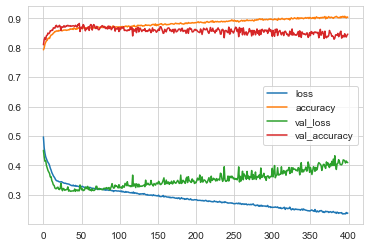

In [42]:
loss_df.plot();

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [43]:
model.evaluate(X_test, y_test, verbose=0)

[0.4646235704421997, 0.8355000019073486]

In [44]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4646235704421997
accuracy :  0.8355000019073486


In [45]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1478  115]
 [ 214  193]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1593
           1       0.63      0.47      0.54       407

    accuracy                           0.84      2000
   macro avg       0.75      0.70      0.72      2000
weighted avg       0.82      0.84      0.83      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [46]:
from tensorflow.keras.optimizers import Adam

In [47]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)#default degeri 0.001 ben arttirdim, stepsize= slope*LR adim sayim artti, hizli ogrenecek.
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)
#patience 15 sefer sonuc degismiyorsa azaliyorsa yukselmiyorsa dur. 
#restore_best_weights = True, en son degeri alma en iyi degeri al. cunku en son deger azalan olabilir.

In [49]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 2s 3ms/step - loss: 0.4928 - accuracy: 0.7942 - val_loss: 0.4458 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4553 - accuracy: 0.7975 - val_loss: 0.4276 - val_accuracy: 0.8188
Epoch 3/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4358 - accuracy: 0.8106 - val_loss: 0.4102 - val_accuracy: 0.8238
Epoch 4/1000
225/225 [==============================] - 1s 4ms/step - loss: 0.4151 - accuracy: 0.8225 - val_loss: 0.3909 - val_accuracy: 0.8350
Epoch 5/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8314 - val_loss: 0.3801 - val_accuracy: 0.8450
Epoch 6/1000
225/225 [==============================] - 1s 4ms/step - loss: 0.3802 - accuracy: 0.8356 - val_loss: 0.3535 - val_accuracy: 0.8537
Epoch 7/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3713 - accuracy: 0.8413 - val_loss: 0.3437 - val_accuracy:

<AxesSubplot:>

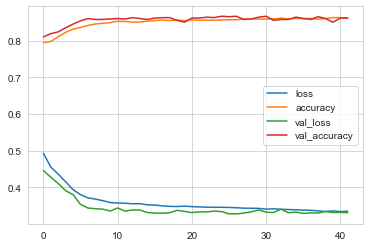

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3550775945186615
accuracy :  0.8560000061988831


In [54]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1551   42]
 [ 246  161]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1593
           1       0.79      0.40      0.53       407

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



### Add Dropout Layer

In [55]:
from tensorflow.keras.layers import Dropout
#overfit' engellemek icin bazi noronlari donduruyorum.

In [56]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 2s 4ms/step - loss: 0.5871 - accuracy: 0.7611 - val_loss: 0.5039 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.5351 - accuracy: 0.7939 - val_loss: 0.4781 - val_accuracy: 0.8100
Epoch 3/1000
225/225 [==============================] - 1s 4ms/step - loss: 0.5173 - accuracy: 0.7947 - val_loss: 0.4661 - val_accuracy: 0.8100
Epoch 4/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.7947 - val_loss: 0.4640 - val_accuracy: 0.8100
Epoch 5/1000
225/225 [==============================] - 1s 4ms/step - loss: 0.5050 - accuracy: 0.7947 - val_loss: 0.4622 - val_accuracy: 0.8100
Epoch 6/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4998 - accuracy: 0.7947 - val_loss: 0.4561 - val_accuracy: 0.8100
Epoch 7/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.7947 - val_loss: 0.4526 - val_accuracy:

225/225 [==============================] - 1s 2ms/step - loss: 0.4125 - accuracy: 0.8236 - val_loss: 0.3418 - val_accuracy: 0.8700
Epoch 58/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.8242 - val_loss: 0.3437 - val_accuracy: 0.8725
Epoch 59/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4149 - accuracy: 0.8235 - val_loss: 0.3430 - val_accuracy: 0.8675
Epoch 60/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8254 - val_loss: 0.3459 - val_accuracy: 0.8637
Epoch 61/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8210 - val_loss: 0.3427 - val_accuracy: 0.8650
Epoch 62/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4141 - accuracy: 0.8229 - val_loss: 0.3464 - val_accuracy: 0.8537
Epoch 63/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8214 - val_loss: 0.3431 - val_accuracy: 0.8637

225/225 [==============================] - 1s 2ms/step - loss: 0.4133 - accuracy: 0.8233 - val_loss: 0.3496 - val_accuracy: 0.8637
Epoch 114/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4066 - accuracy: 0.8293 - val_loss: 0.3386 - val_accuracy: 0.8662
Epoch 115/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8253 - val_loss: 0.3458 - val_accuracy: 0.8637
Epoch 116/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8271 - val_loss: 0.3415 - val_accuracy: 0.8637
Epoch 117/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.8289 - val_loss: 0.3399 - val_accuracy: 0.8637
Epoch 118/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.8297 - val_loss: 0.3405 - val_accuracy: 0.8650
Epoch 119/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4082 - accuracy: 0.8289 - val_loss: 0.3407 - val_accuracy: 

225/225 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8271 - val_loss: 0.3337 - val_accuracy: 0.8637
Epoch 170/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8300 - val_loss: 0.3382 - val_accuracy: 0.8637
Epoch 171/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.8263 - val_loss: 0.3389 - val_accuracy: 0.8600
Epoch 172/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8297 - val_loss: 0.3332 - val_accuracy: 0.8600
Epoch 173/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8279 - val_loss: 0.3357 - val_accuracy: 0.8637
Epoch 174/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8264 - val_loss: 0.3372 - val_accuracy: 0.8562
Epoch 175/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8318 - val_loss: 0.3333 - val_accuracy: 

225/225 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8369 - val_loss: 0.3370 - val_accuracy: 0.8612
Epoch 226/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3972 - accuracy: 0.8347 - val_loss: 0.3448 - val_accuracy: 0.8637
Epoch 227/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.8304 - val_loss: 0.3380 - val_accuracy: 0.8612
Epoch 228/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8313 - val_loss: 0.3361 - val_accuracy: 0.8637
Epoch 229/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3983 - accuracy: 0.8299 - val_loss: 0.3418 - val_accuracy: 0.8650
Epoch 230/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8340 - val_loss: 0.3390 - val_accuracy: 0.8675
Epoch 231/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3905 - accuracy: 0.8335 - val_loss: 0.3347 - val_accuracy: 

225/225 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8339 - val_loss: 0.3512 - val_accuracy: 0.8562
Epoch 282/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8303 - val_loss: 0.3429 - val_accuracy: 0.8637
Epoch 283/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8344 - val_loss: 0.3395 - val_accuracy: 0.8712
Epoch 284/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3909 - accuracy: 0.8343 - val_loss: 0.3390 - val_accuracy: 0.8675
Epoch 285/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3933 - accuracy: 0.8336 - val_loss: 0.3409 - val_accuracy: 0.8725
Epoch 286/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.8340 - val_loss: 0.3460 - val_accuracy: 0.8612
Epoch 287/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8389 - val_loss: 0.3444 - val_accuracy: 

225/225 [==============================] - 1s 3ms/step - loss: 0.3895 - accuracy: 0.8356 - val_loss: 0.3403 - val_accuracy: 0.8687
Epoch 338/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3867 - accuracy: 0.8396 - val_loss: 0.3394 - val_accuracy: 0.8775
Epoch 339/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3936 - accuracy: 0.8339 - val_loss: 0.3433 - val_accuracy: 0.8675
Epoch 340/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3938 - accuracy: 0.8389 - val_loss: 0.3550 - val_accuracy: 0.8562
Epoch 341/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3873 - accuracy: 0.8371 - val_loss: 0.3378 - val_accuracy: 0.8662
Epoch 342/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8368 - val_loss: 0.3414 - val_accuracy: 0.8650
Epoch 343/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3911 - accuracy: 0.8344 - val_loss: 0.3403 - val_accuracy: 

225/225 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8351 - val_loss: 0.3482 - val_accuracy: 0.8700
Epoch 394/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8340 - val_loss: 0.3475 - val_accuracy: 0.8687
Epoch 395/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3903 - accuracy: 0.8364 - val_loss: 0.3495 - val_accuracy: 0.8763
Epoch 396/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8336 - val_loss: 0.3475 - val_accuracy: 0.8650
Epoch 397/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8325 - val_loss: 0.3409 - val_accuracy: 0.8700
Epoch 398/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3938 - accuracy: 0.8357 - val_loss: 0.3478 - val_accuracy: 0.8650
Epoch 399/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3840 - accuracy: 0.8403 - val_loss: 0.3361 - val_accuracy: 

225/225 [==============================] - 1s 2ms/step - loss: 0.3895 - accuracy: 0.8392 - val_loss: 0.3516 - val_accuracy: 0.8687
Epoch 450/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.8326 - val_loss: 0.3494 - val_accuracy: 0.8637
Epoch 451/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8354 - val_loss: 0.3425 - val_accuracy: 0.8712
Epoch 452/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3866 - accuracy: 0.8397 - val_loss: 0.3486 - val_accuracy: 0.8650
Epoch 453/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3873 - accuracy: 0.8354 - val_loss: 0.3413 - val_accuracy: 0.8687
Epoch 454/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3950 - accuracy: 0.8351 - val_loss: 0.3426 - val_accuracy: 0.8712
Epoch 455/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3906 - accuracy: 0.8354 - val_loss: 0.3463 - val_accuracy: 

225/225 [==============================] - 1s 2ms/step - loss: 0.3951 - accuracy: 0.8361 - val_loss: 0.3489 - val_accuracy: 0.8625
Epoch 506/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3906 - accuracy: 0.8357 - val_loss: 0.3480 - val_accuracy: 0.8700
Epoch 507/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3849 - accuracy: 0.8371 - val_loss: 0.3557 - val_accuracy: 0.8650
Epoch 508/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3884 - accuracy: 0.8363 - val_loss: 0.3449 - val_accuracy: 0.8687
Epoch 509/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8385 - val_loss: 0.3453 - val_accuracy: 0.8725
Epoch 510/1000
225/225 [==============================] - 1s 4ms/step - loss: 0.3913 - accuracy: 0.8340 - val_loss: 0.3471 - val_accuracy: 0.8687
Epoch 511/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3856 - accuracy: 0.8390 - val_loss: 0.3455 - val_accuracy: 

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#### Monitor the "val_recall" as metric

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## GridSearchCV

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [ ]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
#for gridsearchcv model

y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("Churn_Prediction", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:

model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:

loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:



loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model.h5')

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___